In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':.5,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Bonds'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]
symbols += ['BND', 'BNDX', 'BNDW', 'BIV', 'AGG']

In [2]:
quote = Quote(symbols, 70, 20)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-04-25 to 2019-07-03 - 70'

In [3]:
stat = quote.statistics()
stat = stat[(stat['drawdown'] < 2) & (stat['mean'] > .8) & (stat['shrp'] > 1.6)]
print(len(stat))
stat

37


,len,mean,std,shrp,drawdown
Symbols,,,,,
BNDW,29,1.638618,0.353630,4.184849,0.254067
BNDX,29,1.596835,0.372115,3.864675,0.193599
BLV,29,3.661997,0.916531,3.822311,0.997839
BND,29,1.638989,0.397177,3.726947,0.289158
BIV,29,2.045863,0.519888,3.629881,0.379736
AGG,29,1.631030,0.406202,3.624547,0.287233
MBB,29,1.037519,0.244172,3.599056,0.325100
VMBS,29,0.917512,0.222302,3.413298,0.264901
IEF,29,2.382038,0.723632,3.072431,0.494367


Populating the interactive namespace from numpy and matplotlib
evicted USIG 0.9935789686896579
evicted TIP 0.9981390393547593
evicted MBB 0.9532508416034681
evicted MUB 0.9834770042907457
evicted BND 0.9906077932849296
evicted TLT 0.999473225650747
evicted VGIT 0.9972944502631772
evicted AGG 0.9831458922577827
evicted IEI 0.9969275576319276
evicted VCSH 0.9867965316774736
evicted ISTB 0.9643942889054309
evicted IGIB 0.9864855112104612
evicted GOVT 0.9930293733311119
evicted VMBS 0.9215497032975161
evicted BSV 0.9523073485913381
evicted SCHP 0.9976434567431588
evicted SCHR 0.986023649562916
evicted SLQD 0.9785004873128451
evicted IPE 0.9109260107693675
evicted TDTT 0.8819162152402051
evicted VCIT 0.9859551492322048
evicted VTEB 0.9774764440321648
evicted IGSB 0.9419748473140906
evicted IEF 0.9338194785564714
evicted BIV 0.9311858438858233
evicted SPIB 0.9522322730206226
evicted BLV 0.9196974499965012
evicted SPTL 0.7777620913321286
evicted BNDW 0.903800998145552
evicted ITM 0.9724174871

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,1.262056,0.152598,0.927988,1.140800,1.230683,1.346735,1.585925,7.230292,0.142430
BNDX,29.0,1.596835,0.372115,0.845117,1.514624,1.635374,1.777101,2.313707,3.864675,0.193599
HYD,29.0,0.922890,0.351716,0.246670,0.688399,0.802295,1.138780,1.668247,2.172658,0.409065


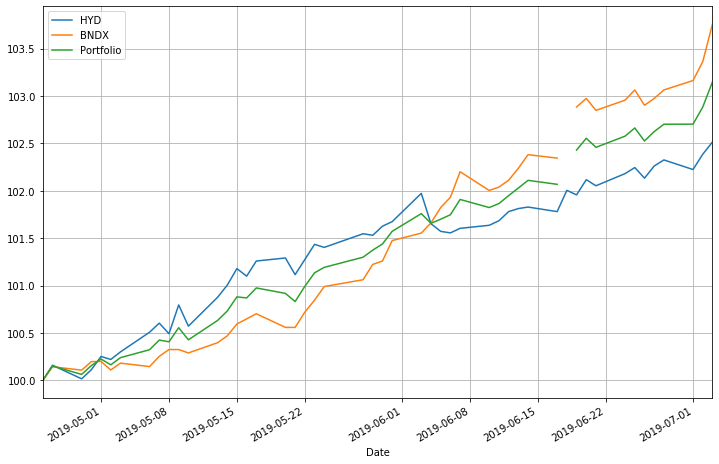

In [4]:
%pylab inline
quote.drop_mask()
ratio = quote.optimize_portfolio(stat.index)
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)